In [47]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import visualizations
from prediction_age import AgePredictor
from preprocessing import *
import dataset

# external libs
import pandas as pd
import geopandas as gpd
from shapely import wkt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [2]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [4]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1)

## 2-Step Prediction: Classification + Regression

2022-01-17 18:17:21,026 | INFO : Dataset length: 209774
2022-01-17 18:17:21,303 | INFO : Test dataset length: 41955
2022-01-17 18:17:21,304 | INFO : Training dataset length: 167819
2022-01-17 18:17:21,306 | INFO : Standard deviation of test set: 79.97388537768047
2022-01-17 18:17:21,502 | INFO : Test dataset length after preprocessing: 41955
2022-01-17 18:17:21,503 | INFO : Training dataset length after preprocessing: 167819
2022-01-17 18:17:21,505 | INFO : Standard deviation of test set after preprocessing: 2.058114277475774
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was 

[18:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

          -1       0.78      0.91      0.84     24655
           0       0.52      0.49      0.50      5937
           1       0.46      0.15      0.22      1026
           2       0.39      0.17      0.24      1176
           3       0.44      0.30      0.36      2788
           4       0.47      0.41      0.44      3488
           5       0.43      0.30      0.36      2885

    accuracy                           0.68     41955
   macro avg       0.50      0.39      0.42     41955
weighted avg       0.65      0.68      0.66     41955



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


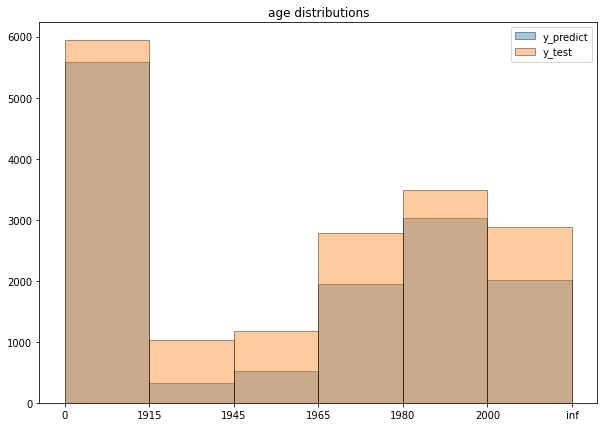

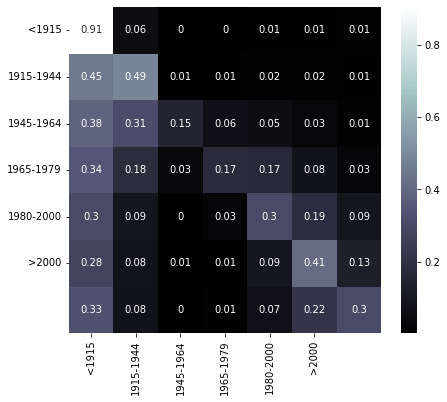

In [8]:
model = XGBClassifier()
classifier = AgePredictor(
    model=model,
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[categorize_age_custom_bands]
)
classifier.evaluate_classification()

2022-01-17 19:19:27,963 | INFO : Dataset length: 862167
2022-01-17 19:19:29,570 | INFO : Test dataset length: 431084
2022-01-17 19:19:29,571 | INFO : Training dataset length: 431083
2022-01-17 19:19:29,575 | INFO : Standard deviation of test set: 80.97285675577442
2022-01-17 19:19:30,344 | INFO : Test dataset length after preprocessing: 431084
2022-01-17 19:19:30,345 | INFO : Training dataset length after preprocessing: 431083
2022-01-17 19:19:30,349 | INFO : Standard deviation of test set after preprocessing: 0.49246546204301284
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y 

[19:19:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.81      0.80    178263
           1       0.86      0.84      0.85    252821

    accuracy                           0.83    431084
   macro avg       0.82      0.83      0.82    431084
weighted avg       0.83      0.83      0.83    431084



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


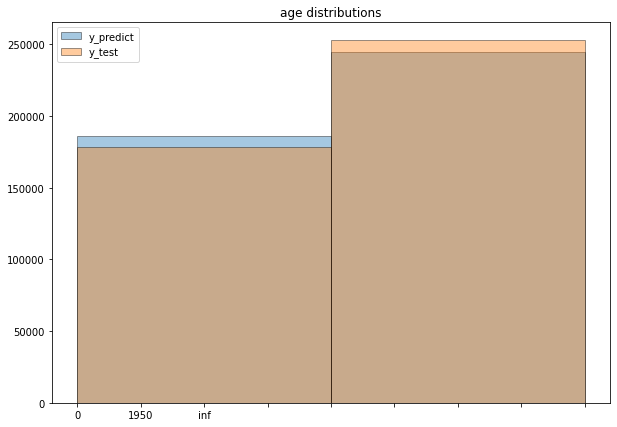

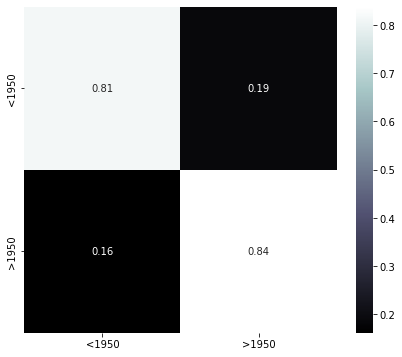

In [48]:
# model = XGBClassifier(objective='multi:softmax', num_class=2, use_label_encoder=False, eval_metric=["merror", "mlogloss"])
model = XGBClassifier()
binary_classifier = AgePredictor(
    model=model,
    df=data_france,
    test_training_split=split_50_50,
    preprocessing_stages=[categorize_age_custom_bands]
)
binary_classifier.evaluate_classification()

2022-01-17 18:46:47,145 | INFO : Dataset length: 85952
2022-01-17 18:46:47,216 | INFO : Test dataset length: 17191
2022-01-17 18:46:47,217 | INFO : Training dataset length: 68761
2022-01-17 18:46:47,219 | INFO : Standard deviation of test set: 81.21887504956705
2022-01-17 18:46:47,296 | INFO : Test dataset length after preprocessing: 17191
2022-01-17 18:46:47,296 | INFO : Training dataset length after preprocessing: 68761
2022-01-17 18:46:47,299 | INFO : Standard deviation of test set after preprocessing: 0.9249025542296636


              precision    recall  f1-score   support

           0       0.71      0.79      0.74      5907
           1       0.57      0.25      0.35      1699
           2       0.82      0.85      0.84      9585

    accuracy                           0.77     17191
   macro avg       0.70      0.63      0.64     17191
weighted avg       0.76      0.77      0.76     17191



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


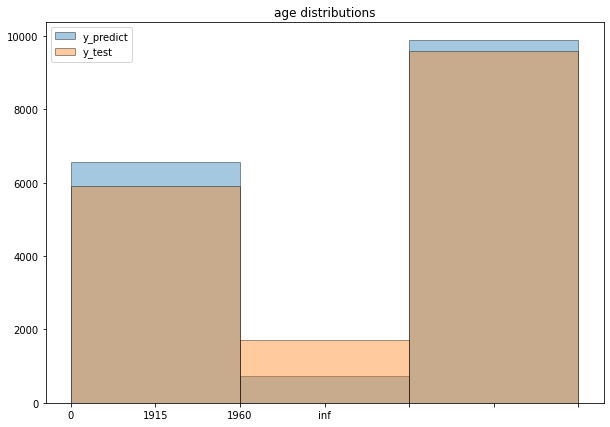

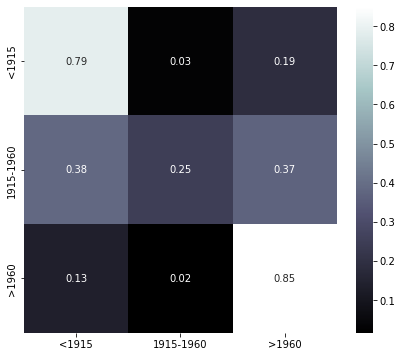

In [26]:
model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric=["merror", "mlogloss"])
classifier = AgePredictor(
    model=model,
    df=data_france_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[categorize_age_custom_bands]
)
classifier.evaluate_classification()

2022-01-17 20:55:13,890 | INFO : Dataset length: 24359
2022-01-17 20:55:13,911 | INFO : Test dataset length: 4872
2022-01-17 20:55:13,912 | INFO : Training dataset length: 19487
2022-01-17 20:55:13,913 | INFO : Standard deviation of test set: 52.23791545526974
2022-01-17 20:55:13,959 | INFO : Test dataset length after preprocessing: 4429
2022-01-17 20:55:13,960 | INFO : Training dataset length after preprocessing: 17767
2022-01-17 20:55:13,961 | INFO : Standard deviation of test set after preprocessing: 20.95956400929155


MAE: 14.01896262669515 y
RMSE: 18.900533980653805 y
R2: 0.18664202849615108


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


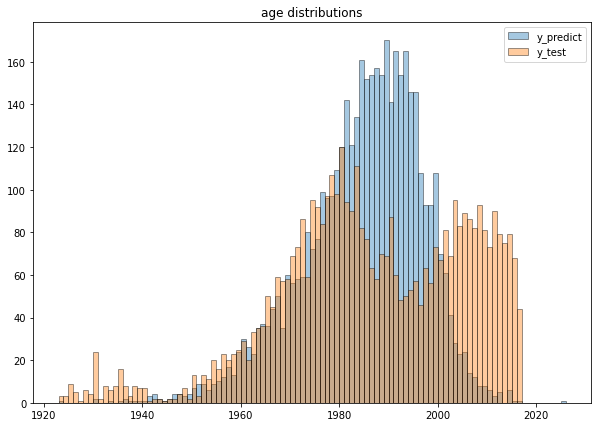

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 432x288 with 0 Axes>

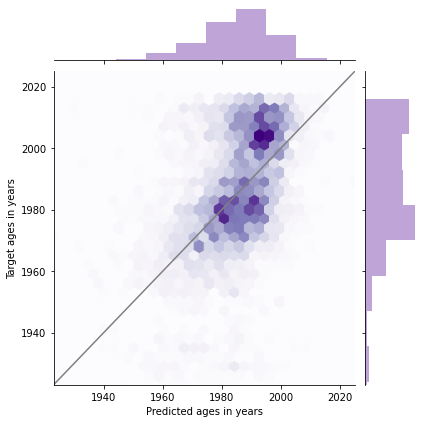

invalid value encountered in true_divide


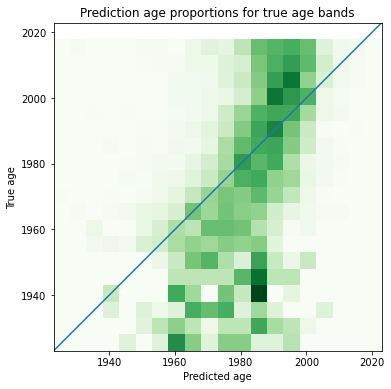

In [53]:
new_building_idx = binary_classifier.y_predict[binary_classifier.y_predict[dataset.AGE_ATTRIBUTE] == 1].index
new_building_ids = binary_classifier.aux_vars_test.iloc[new_building_idx]['id']
new_buildings = data_france_sample[data_france_sample['id'].isin(new_building_ids)]

predictor = AgePredictor(
    model=XGBRegressor(),
    df=new_buildings,
    test_training_split=split_80_20,
    preprocessing_stages=[remove_outliers]
)
predictor.evaluate_regression()
